In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [100]:
df=pd.read_csv("Resources/Raw/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [101]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [102]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [103]:
df=df.dropna()

In [104]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [105]:
df.hvplot.scatter(x="Year",y="Life expectancy ",by="Country")

:NdOverlay   [Country]
   :Scatter   [Year]   (Life expectancy )

## Multiple Linear Regression 

### Model to predict life expectancy

In [14]:
y=df["Life expectancy "]
X=df.drop(columns=["Country","Year","Status","Life expectancy "])

In [29]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [30]:
# Fitting the model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

In [32]:
# Predicting the life expectancy values
y_pred=lm.predict(X_test)

In [37]:
# Performance of the model

from sklearn.metrics import r2_score,mean_squared_error

print (f"The correlation coefficient is {r2_score(y_test,y_pred):.3f}")
print (f"The mean squared error is {mean_squared_error(y_test,y_pred):.3f}")

The correlation coefficient is 0.833
The mean squared error is 14.628


In [38]:
# Training and Testing scores

training_score=lm.score(X_train,y_train)
testing_score=lm.score(X_test,y_test)

print(f"Training Score: {training_score:.3f}")
print(f"Testing Score: {testing_score:.3f}")

Training Score: 0.834
Testing Score: 0.833


Text(0, 0.5, 'Residuals')

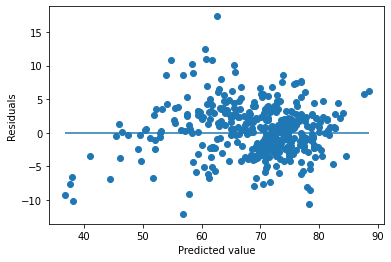

In [45]:
# Plotting the residuals
plt.scatter(y_pred,y_pred-y_test)
plt.hlines(y=0,xmin=y_pred.min(),xmax=y_pred.max())
plt.xlabel("Predicted value")
plt.ylabel("Residuals")

In [47]:
# Calculating the intercept

print(f"The intercept is {lm.intercept_:.3f}")

The intercept is 53.654


In [51]:
# Calculating the coefficients

print("The coefficients are:")

for item in zip(X.columns,lm.coef_):
    print(item)

The coefficients are:
('Adult Mortality', -0.016846196073806937)
('infant deaths', 0.08881390197620215)
('Alcohol', -0.07416803737473793)
('percentage expenditure', 0.0003960174960681574)
('Hepatitis B', -0.006241895165662445)
('Measles ', -7.889335502402737e-06)
(' BMI ', 0.02817535297566097)
('under-five deaths ', -0.06758422524093274)
('Polio', 0.013101084561440502)
('Total expenditure', 0.06365891307976247)
('Diphtheria ', 0.011672727862539395)
(' HIV/AIDS', -0.4577672882278973)
('GDP', 1.3217868544683351e-05)
('Population', 3.051433966616557e-10)
(' thinness  1-19 years', 0.028971896670251206)
(' thinness 5-9 years', -0.09997271636372156)
('Income composition of resources', 8.815572363774232)
('Schooling', 0.9344442105183265)


## Logistic Regression

### Model to predict country's status

In [52]:
# Defining feature and target
y_s=df["Status"]
X_s=df.drop(columns=["Country","Year","Status"])

In [57]:
# Splitting the data
X_s_train,X_s_test,y_s_train,y_s_test=train_test_split(X_s,y_s,random_state=42)

In [58]:
# Standardizing the data
X_scaler=StandardScaler().fit(X_s_train)
X_s_train_scaled=X_scaler.transform(X_s_train)
X_s_test_scaled=X_scaler.transform(X_s_test)

In [59]:
# Fitting the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs',random_state=42)
lr.fit(X_s_train_scaled,y_s_train)

LogisticRegression(random_state=42)

In [65]:
predicted_status=lr.predict(X_s_test_scaled)

In [62]:
print(f"The accuracy of the model is : {accuracy_score(y_s_test,predicted_status):.3f}")

The accuracy of the model is : 0.925


In [63]:
print("The confusion matrix is as follows:")
print(confusion_matrix(y_s_test,predicted_status))

The confusion matrix is as follows:
[[ 39  20]
 [ 11 343]]


In [67]:
print("The classification report is as follows:")
print(classification_report(y_s_test,predicted_status))

The classification report is as follows:
              precision    recall  f1-score   support

   Developed       0.78      0.66      0.72        59
  Developing       0.94      0.97      0.96       354

    accuracy                           0.92       413
   macro avg       0.86      0.81      0.84       413
weighted avg       0.92      0.92      0.92       413



## Random Forest

### Model to predict country's status

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_s_train_scaled,y_s_train)

RandomForestClassifier(random_state=42)

In [69]:
predicted_status_rf=rfc.predict(X_s_test_scaled)

In [70]:
print(f"The accuracy of the model is : {accuracy_score(y_s_test,predicted_status_rf):.3f}")

The accuracy of the model is : 0.978


In [72]:
print("The confusion matrix is as follows:")
print(confusion_matrix(y_s_test,predicted_status_rf))

The confusion matrix is as follows:
[[ 52   7]
 [  2 352]]


In [73]:
print("The classification report is as follows:")
print(classification_report(y_s_test,predicted_status_rf))

The classification report is as follows:
              precision    recall  f1-score   support

   Developed       0.96      0.88      0.92        59
  Developing       0.98      0.99      0.99       354

    accuracy                           0.98       413
   macro avg       0.97      0.94      0.95       413
weighted avg       0.98      0.98      0.98       413



## KMeans Clustering

### Studying clusters in data

In [106]:
# Reindexing dataframe
df=df.reset_index(drop=True)

In [107]:
# Tranforming country status
onc=OneHotEncoder(sparse=False)

encoded_df=pd.DataFrame(onc.fit_transform(df["Status"].values.reshape(-1,1)))
encoded_df.columns=onc.get_feature_names_out(["Status"])
encoded_df.tail()

,Status_Developed,Status_Developing
1644,0.0,1.0
1645,0.0,1.0
1646,0.0,1.0
1647,0.0,1.0
1648,0.0,1.0


In [110]:
# Merging the dataframes
cluster_df=df.join(encoded_df)
cluster_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [111]:
# Dropping unwanted columns

cluster_df.drop(columns=["Country","Year","Status"],inplace=True)
cluster_df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.0,1.0
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.0,1.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.0,1.0
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0.0,1.0
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0.0,1.0


In [112]:
cluster_df.dtypes

Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Status_Developed                   float64
Status_Developing                  float64
dtype: object

In [114]:
# Scaling the data
cluster_scaled=StandardScaler().fit_transform(cluster_df)

In [118]:
# Applying PCA to reduce dimensions from 21 to 4

from sklearn.decomposition import PCA

pca=PCA(n_components=3)
cluster_pca=pca.fit_transform(cluster_scaled)

In [119]:
# Checking the explained variance ratio - Variables will be adjusted to use fewer parameters in next iteration
pca.explained_variance_ratio_

array([0.32763289, 0.14379886, 0.09156025])

In [130]:
# Adding pca values to df

pca_df=pd.DataFrame(cluster_pca,columns=["PC1","PC2","PC3"])

C:\Users\dhanu\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  "KMeans is known to have a memory leak on Windows "


<AxesSubplot:xlabel='Number of clusters', ylabel='Inertia'>

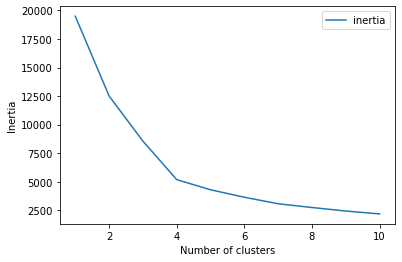

In [131]:
# Identifying best value for k

from sklearn.cluster import KMeans

inertia=[]
k = list(range(1,11))

# Looping through definined k options
for value in k:
    km = KMeans(n_clusters=value,random_state=42)
    km.fit(pca_df)
    inertia.append(km.inertia_)
    
# Elbow curve
elbow_df=pd.DataFrame({"k":k,"inertia":inertia})

elbow_df.plot(x="k",y="inertia",xlabel="Number of clusters",ylabel="Inertia")

In [132]:
# KMeans Clustering

kmodel=KMeans(n_clusters=4,random_state=42)
kmodel.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [134]:
# Predicting the cluster

cluster=kmodel.predict(pca_df)

pca_df["Class"]=kmodel.labels_
pca_df.head()

,PC1,PC2,PC3,Class
0,3.840589,0.605383,1.307683,3
1,3.696228,0.330889,0.715271,3
2,3.733217,0.529106,0.523612,3
3,3.709332,0.441670,0.384186,3
4,3.850560,0.448250,0.294861,3


In [135]:
combined_df=df.join(pca_df)
combined_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,PC1,PC2,PC3,Class
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,3.840589,0.605383,1.307683,3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,3.696228,0.330889,0.715271,3
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,3.733217,0.529106,0.523612,3
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,3.709332,0.441670,0.384186,3
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,3.850560,0.448250,0.294861,3


In [137]:
combined_df.hvplot.scatter(x="PC1",y="PC2",by="Class",hover_cols=["Country","Year"])

:NdOverlay   [Class]
   :Scatter   [PC1]   (PC2,Country,Year)

In [156]:
class_df=combined_df.groupby(["Country","Class"])[["Country"]].count()
print(class_df.to_string())

                                Country
Country                  Class         
Afghanistan              3           16
Albania                  1           16
Algeria                  1           11
Angola                   3            8
Argentina                1           13
Armenia                  1           15
Australia                2           14
Austria                  2           15
Azerbaijan               1           10
                         3            3
Bangladesh               3           12
Belarus                  1           14
                         3            1
Belgium                  2           15
Belize                   1           15
Benin                    3           13
Bhutan                   1            2
                         3           13
Bosnia and Herzegovina   1           10
                         3            1
Botswana                 1            5
                         3           10
Brazil                   1           15


In [160]:
combined_df[["Country","Class"]].value_counts()

Country                 Class
Afghanistan             3        16
Albania                 1        16
Maldives                1        15
Dominican Republic      1        15
Ecuador                 1        15
                                 ..
Georgia                 3         1
Malawi                  1         1
Bosnia and Herzegovina  3         1
Romania                 1         1
Fiji                    3         1
Length: 185, dtype: int64